In [75]:
import numpy as np
import pymatgen.symmetry.analyzer as analyzer
from pymatgen.ext.matproj import MPRester
from pymatgen.analysis.diffraction import xrd
from matplotlib import pyplot as plt
from pymatgen.analysis.diffraction.core import AbstractDiffractionPatternCalculator

with MPRester("v5zOFTlhqtoyEiw1") as m:
    material_id = "mp-753260"
    # Structure for material id
    structure = m.get_structure_by_material_id(material_id)
    structure.to(filename="LaAgO2_computed.cif")#computes the computed version
    
    #0 define new structure to obtain a=b=c and alpha=beta=gamma ainsi que le symmetrized et le conventional car je ne sais pas 
    #lequel je vais utiliser
    new_structure =  analyzer.SpacegroupAnalyzer(structure).get_primitive_standard_structure()
    

    #instructions : for the material, determine the 3 first picks of the diffractogramme (with the coefficients of the base vectors (hkl)
    #with an incident x-ray beam of CuKa with wavelength (\lambda = 1.54 Angstrom = 1.54^(-10)m)

    #1 create a xrd object where the information about the diffraction is stored
    xclass = xrd.XRDCalculator(wavelength='CuKa')

    #2 for the rest of the notebook we will work with new_structure to have a=b=c and alpha=beta=gamma
    pattern = xclass.get_pattern(new_structure, scaled=True, two_theta_range=None) #scaled
    pattern2 = xclass.get_pattern(new_structure, scaled=False, two_theta_range=None) #unscaled
    
    
   

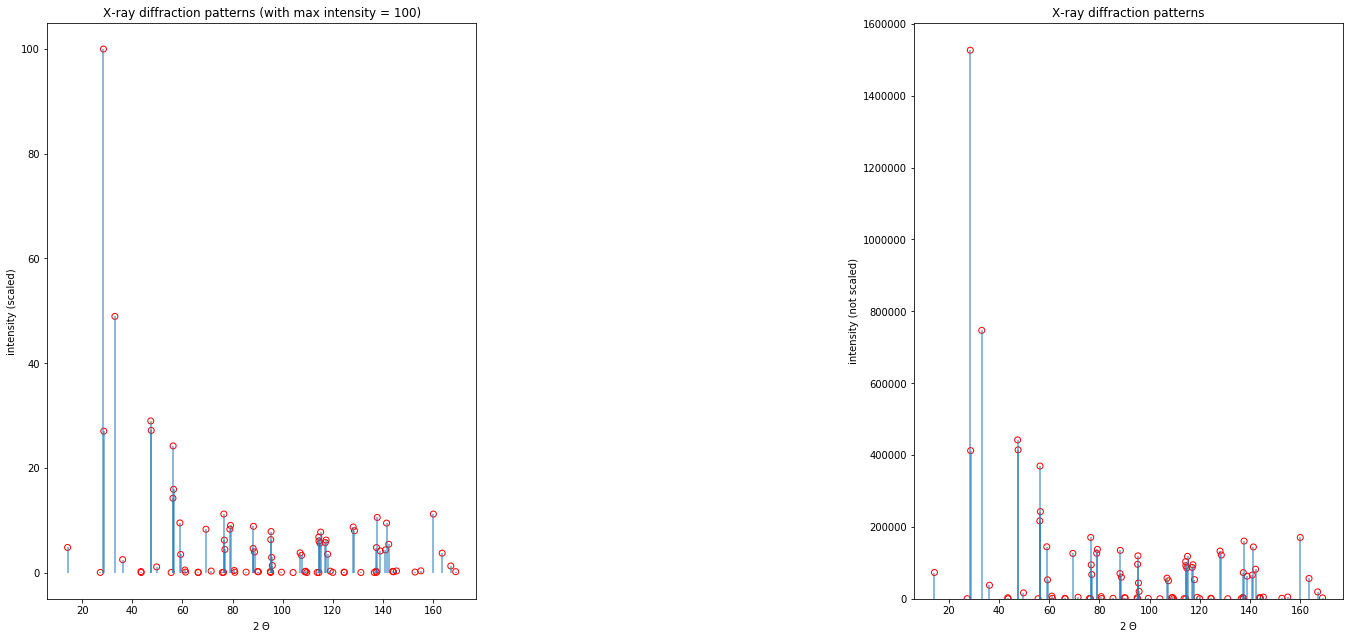

In [76]:
#2 plot to show the diffraction pattern / on the right the intensity is scaled, on the left it isn't
plt.figure()
plt.subplot(131)
plt.scatter(pattern.x,pattern.y,facecolors='none', edgecolors='r')
plt.bar(pattern.x,pattern.y, align='center', alpha=0.5)
plt.xlabel("2 $\Theta$")
plt.ylabel("intensity (scaled)")
plt.title("X-ray diffraction patterns (with max intensity = 100)")
plt.subplot(133)
plt.scatter(pattern2.x,pattern2.y,facecolors='none', edgecolors='r')
plt.bar(pattern2.x,pattern2.y, align='center', alpha=0.5)
plt.xlabel("2 $\Theta$")
plt.ylabel("intensity (not scaled)")
plt.title("X-ray diffraction patterns")
plt.subplots_adjust(left=0.0, bottom=0.0, top=2.0, right=3.0,  wspace=0.01, hspace=1.0)
plt.show()



In [78]:
#3 we can determine the 3 biggest picks with the help of the bar chart above, we see that the 3 biggest intensities are at index 2,4,8 (see the red empty balls).
#The picks have respectively angles 2 Theta and intensities :(28.62°, 100) , (33.08° , 48.9) and (47.39°, 28.96)



for i in positions:
    
    print("diffraction peak ", i , " : 2 \u0398 = ", round(pattern.x[i],3), 'degrees')
    print("                       Intensity (on a scale of 100) : ", round(pattern.y[i],3)) 
    print("                       hkl : ", pattern.hkls[i][0]['hkl'])
    print("                       multiplicity : ", pattern.hkls[i][0]['multiplicity'])
    print('\n')


diffraction peak  2  : 2 Θ =  28.511 degrees
                       Intensity (on a scale of 100) :  100.0
                       hkl :  (1, 1, 0)
                       multiplicity :  6


diffraction peak  4  : 2 Θ =  33.08 degrees
                       Intensity (on a scale of 100) :  48.93
                       hkl :  (2, 1, 1)
                       multiplicity :  6


diffraction peak  8  : 2 Θ =  47.391 degrees
                       Intensity (on a scale of 100) :  28.964
                       hkl :  (1, 0, -1)
                       multiplicity :  6


